### Zomato Restaurant - Average Rating Prediction

In [41]:
#!pip install wordcloud

In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

pd.set_option("display.max_columns", 50)

In [5]:
df=pd.read_csv("./input/zomato.csv",encoding = "ISO-8859-1")
country = pd.read_excel('./input/Country-Code.xlsx')
df = pd.merge(df, country, on='Country Code')
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


In [6]:
df.shape

(9551, 22)

## 9551 rows and 21 columns are there in the dataset

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import DataFrame

# Checking for the data types

In [8]:
df.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
Country                  object
dtype: object

In [9]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


In [10]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


# Above is the Quick view of the dataset

In [11]:
df1=df.groupby(["Cuisines"])

# Grouping data according to cuisines

In [13]:
df1.mean(numeric_only=True)


,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
Cuisines,,,,,,,,
Afghani,13898683.75,1.0,77.145669,28.507631,512.5,1.75,0.725,9.75
"Afghani, Mughlai, Chinese",18355119.00,1.0,77.245796,28.558387,500.0,2.00,0.000,2.00
"Afghani, North Indian",18435789.00,1.0,77.045289,28.439285,900.0,2.00,0.000,0.00
"Afghani, North Indian, Pakistani, Arabian",301675.00,1.0,77.266754,28.659755,500.0,2.00,0.000,3.00
African,75027.00,189.0,28.236047,-25.770748,450.0,4.00,4.700,373.00
...,...,...,...,...,...,...,...,...
"Western, Asian, Cafe",18391256.00,94.0,106.911335,-6.163948,250000.0,3.00,4.200,259.00
"Western, Fusion, Fast Food",18479742.00,184.0,103.858430,1.301707,60.0,4.00,3.200,32.00
World Cuisine,6004011.00,208.0,32.869800,39.898239,80.0,3.00,4.900,95.00


# Grouping according to City

In [14]:
df2=df.groupby(["City"])
df2.mean(numeric_only=True)

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
City,,,,,,,,
Abu Dhabi,8.210826e+06,214.0,54.405998,24.464269,182.000000,3.300000,4.300000,302.250000
Agra,3.400166e+06,1.0,54.622830,19.016683,1065.000000,2.650000,3.965000,103.100000
Ahmedabad,7.064363e+06,1.0,72.531324,23.036910,857.142857,2.571429,4.161905,584.095238
Albany,1.728425e+07,216.0,-84.186592,31.602963,19.750000,1.700000,3.555000,83.800000
Allahabad,3.974018e+06,1.0,61.378793,19.089371,517.500000,2.650000,3.395000,69.600000
...,...,...,...,...,...,...,...,...
Weirton,1.769406e+07,216.0,-80.529488,40.396043,25.000000,2.000000,3.900000,156.000000
Wellington City,7.100704e+06,148.0,174.778100,-41.293814,71.250000,3.250000,4.250000,146.300000
Winchester Bay,1.755979e+07,216.0,-124.175346,43.678998,25.000000,2.000000,3.200000,16.000000


In [15]:
df3=df["City"].value_counts()
df3

City
New Delhi           5473
Gurgaon             1118
Noida               1080
Faridabad            251
Ghaziabad             25
                    ... 
Panchkula              1
Mc Millan              1
Mayfield               1
Macedon                1
Vineland Station       1
Name: count, Length: 141, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, 'Australia'),
  Text(1, 0, 'Brazil'),
  Text(2, 0, 'Canada'),
  Text(3, 0, 'India'),
  Text(4, 0, 'Indonesia'),
  Text(5, 0, 'New Zealand'),
  Text(6, 0, 'Phillipines'),
  Text(7, 0, 'Qatar'),
  Text(8, 0, 'Singapore'),
  Text(9, 0, 'South Africa'),
  Text(10, 0, 'Sri Lanka'),
  Text(11, 0, 'Turkey'),
  Text(12, 0, 'UAE'),
  Text(13, 0, 'United Kingdom'),
  Text(14, 0, 'United States')])

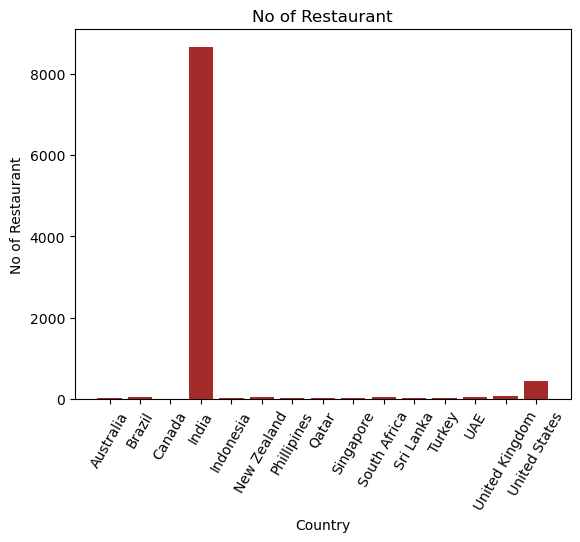

In [16]:
data_country = df.groupby(['Country'], as_index=False).count()[['Country', 'Restaurant ID']]
data_country.head()
data_country.columns = ['Country', 'No of Restaurant']
#plt.figure(figsize=(20,30))
plt.bar(data_country['Country'], data_country['No of Restaurant'],color="brown")
plt.xlabel('Country')
plt.ylabel('No of Restaurant')
plt.title('No of Restaurant')
plt.xticks(rotation = 60)

> # Inference:
# 1. Indian city has maximum number of Zomato restaurants
# 2. Zomato has its presence in 23 countries but the most important country is India

# So, we should focus on India because of the above reasons

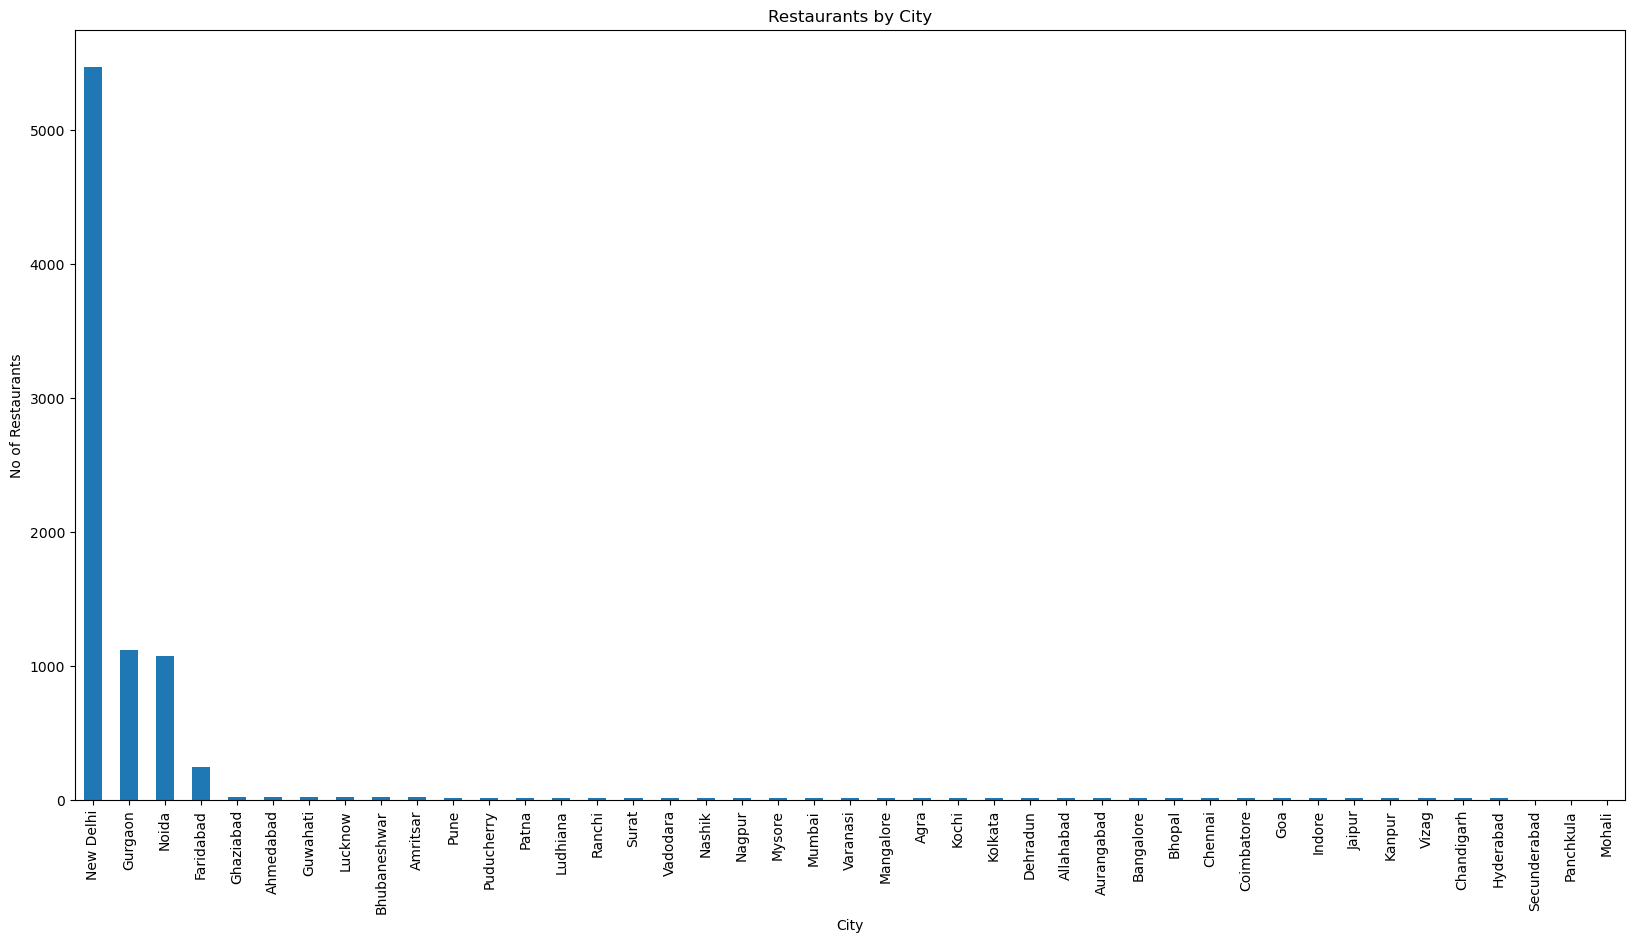

In [17]:
data_City = df[df['Country'] =='India']
Total_city =data_City['City'].value_counts()
Total_city.plot.bar(figsize=(20,10))
plt.title('Restaurants by City')                                             
plt.xlabel('City')
plt.ylabel('No of Restaurants')
plt.show()

# Inference:
# 1. New Delhi has the highest number of restaraunts associated with Zomato with a count of more than 5000.
# 2. Gurgaon and Noida are behind New Delhi with count of more than 1000 restaurants associated with Zomato

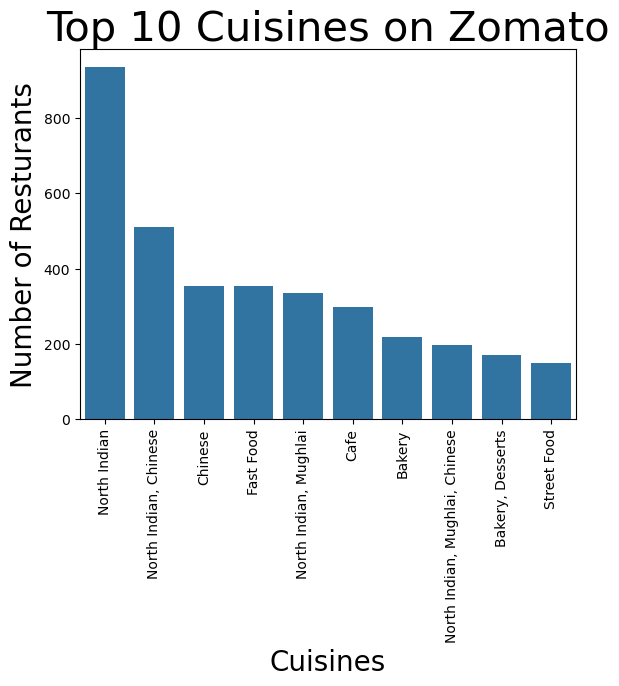

In [22]:
Cuisine_data =df.groupby(['Cuisines'], as_index=False)['Restaurant ID'].count()
Cuisine_data.columns = ['Cuisines', 'Number of Resturants']
Top10= (Cuisine_data.sort_values(['Number of Resturants'],ascending=False)).head(10)
#plt.figure(figsize=(20,30))
sns.barplot(data=Top10, x='Cuisines', y='Number of Resturants')
plt.xlabel('Cuisines', fontsize=20)
plt.ylabel('Number of Resturants', fontsize=20)
plt.title('Top 10 Cuisines on Zomato', fontsize=30)
plt.xticks(rotation = 90)
plt.show()

# Inference:
# 1. Restaurants providing only North-Indian cuisines are the highest in number with count of approximate 850
# 2. Restaurants providing both Chinese and North Indian and restaurants providing only Chinese are behind the resturants providing both North-Indianwith a count of approx 450 and 380 respectively.

In [23]:
dummy_cuisines=pd.get_dummies(df["Has Online delivery"])
df4=dummy_cuisines.sum()


Text(0, 0.5, 'Count of restaurants')

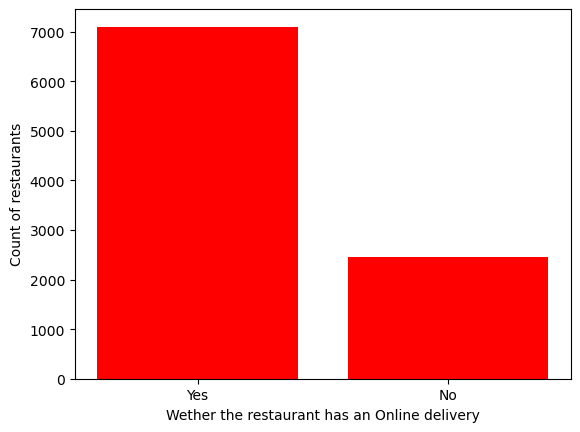

In [24]:
DataFrame(df4)
x=["Yes","No"]
plt.bar(x,df4,color="red")
plt.xlabel("Wether the restaurant has an Online delivery")
plt.ylabel("Count of restaurants")

# Results:
# 1. A bar graph presentation which shows how many restaurants    provide Online Delivery.
 

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Table which shows the count of restaurants on the basis of Rating: Average,Excellent,Good,Not rated,Poor,Very Good in different cities.

In [26]:
pd.crosstab(df['Rating text'], df['City'])

City,Abu Dhabi,Agra,Ahmedabad,Albany,Allahabad,Amritsar,Ankara,Armidale,Athens,Auckland,Augusta,Aurangabad,Balingup,Bandung,Bangalore,Beechworth,Bhopal,Bhubaneshwar,Birmingham,Bogor,Boise,Brasí_lia,Cape Town,Cedar Rapids/Iowa City,Chandigarh,...,Secunderabad,Sharjah,Singapore,Sioux City,Surat,Sí£o Paulo,Tagaytay City,Taguig City,Tampa Bay,Tangerang,Tanunda,Trentham East,Vadodara,Valdosta,Varanasi,Vernonia,Victor Harbor,Vineland Station,Vizag,Waterloo,Weirton,Wellington City,Winchester Bay,Yorkton,ÛÁstanbul
Rating text,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Average,0,1,0,7,15,5,1,0,0,0,0,16,1,0,0,0,2,0,2,0,0,6,0,0,2,...,0,0,9,0,1,2,0,0,0,0,0,0,0,2,8,0,0,0,0,1,0,0,1,1,0
Excellent,7,1,3,0,0,0,5,0,3,9,3,0,0,0,9,1,1,2,2,0,3,1,3,3,2,...,1,2,0,0,0,4,1,3,10,1,0,0,2,0,0,0,0,0,2,0,0,3,0,0,5
Good,1,9,5,13,5,12,1,1,2,1,5,4,0,0,2,0,8,10,8,1,1,8,7,4,2,...,0,6,8,17,9,3,0,0,2,1,0,0,9,17,11,0,1,0,10,19,1,1,0,0,2
Not rated,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Poor,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Very Good,12,9,13,0,0,4,13,0,15,9,12,0,0,1,9,0,9,9,7,1,16,4,10,13,12,...,1,11,3,3,10,8,0,1,8,0,1,1,9,1,1,1,0,1,8,0,0,16,0,0,7


In [27]:
%matplotlib inline

In [30]:
df.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines


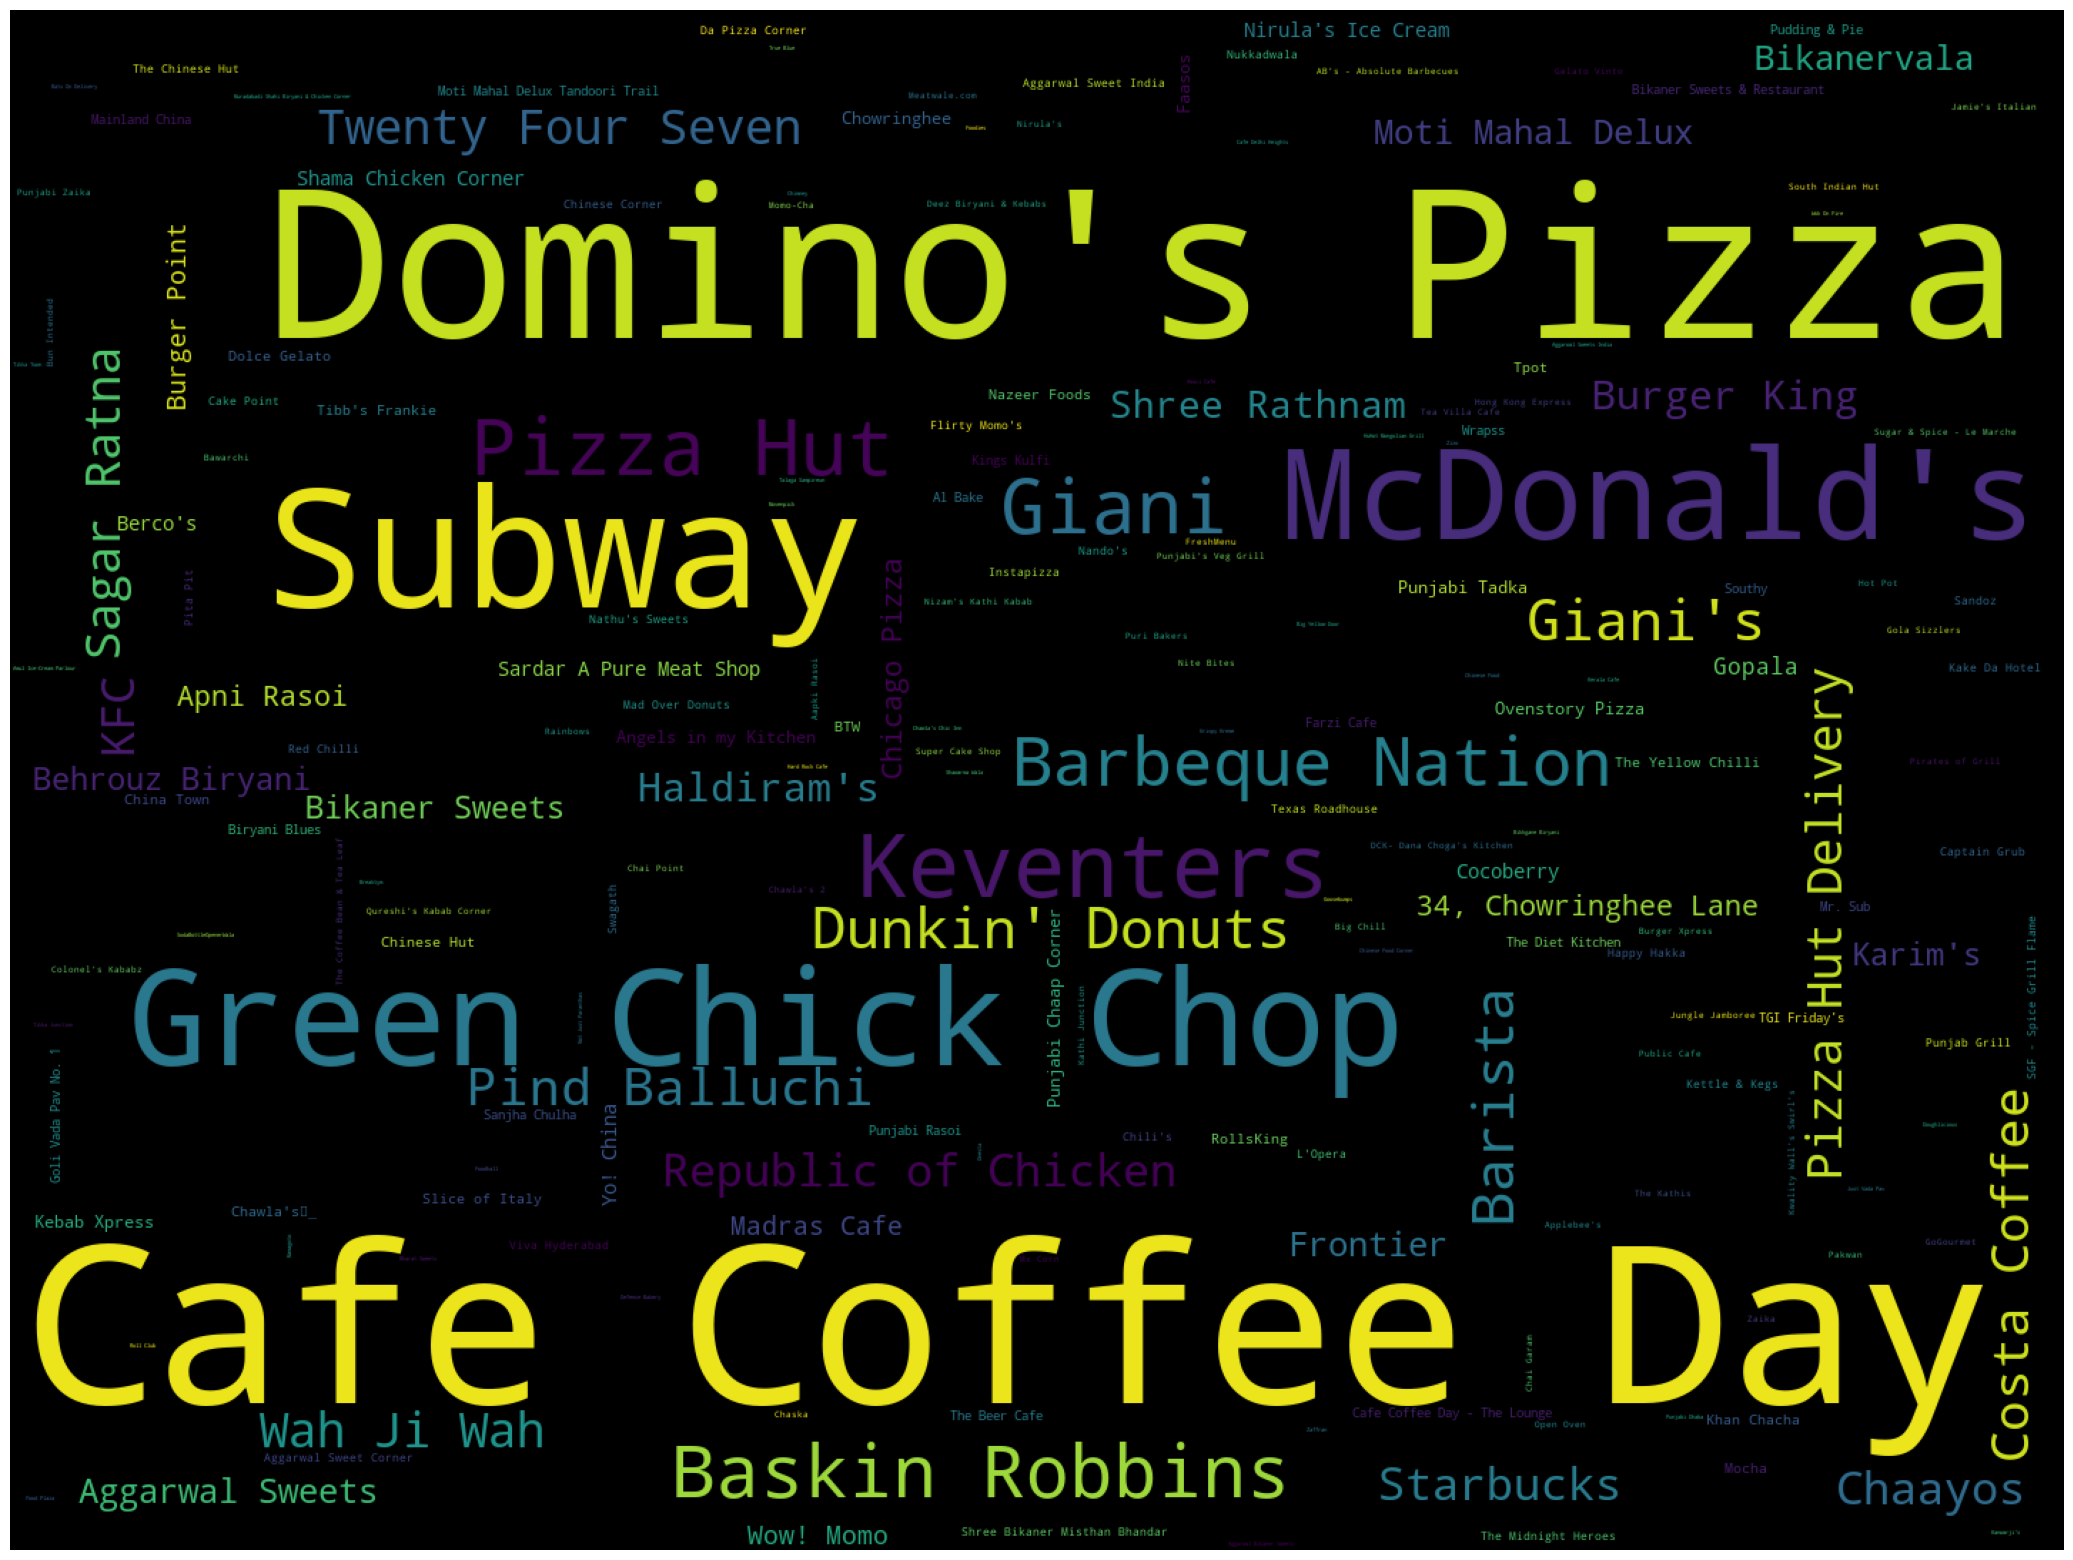

In [42]:
from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
wordcloud = (WordCloud(width=1440, height=1080, relative_scaling=1, stopwords=stopwords).generate_from_frequencies(df['Restaurant Name'].value_counts()))


fig = plt.figure(1,figsize=(30,20))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# Inference:
# 1. Cafe Coffee Day has maximum number of restaurants associated with Zomato in INDIA followed by Domino's Pizza and Green Chick Chop.

In [43]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import *

Text(0, 0.5, 'Average Cost for two')

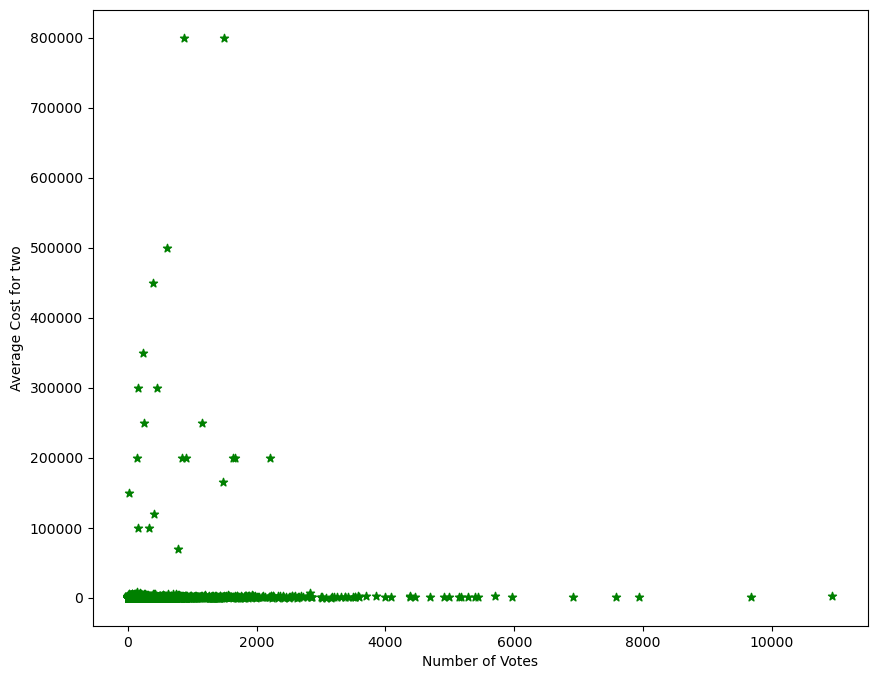

In [44]:
plt.figure(figsize=(10,8))
plt.scatter(df["Votes"],df["Average Cost for two"],marker="*",color="green")
plt.xlabel("Number of Votes")
plt.ylabel("Average Cost for two")



# From above scatter plot it is clear that there is almost no relationship between Votes(to restaraunt by its customer) and Average Cost for two.

## Correlation between various elements of the dataset

In [46]:
df.corr(numeric_only=True)

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
Restaurant ID,1.000000,0.148471,-0.226081,-0.052081,-0.001693,-0.134540,-0.326212,-0.147023
Country Code,0.148471,1.000000,-0.698299,0.019792,0.043225,0.243327,0.282189,0.154530
Longitude,-0.226081,-0.698299,1.000000,0.043207,0.045891,-0.078939,-0.116818,-0.085101
Latitude,-0.052081,0.019792,0.043207,1.000000,-0.111088,-0.166688,0.000516,-0.022962
Average Cost for two,-0.001693,0.043225,0.045891,-0.111088,1.000000,0.075083,0.051792,0.067783
Price range,-0.134540,0.243327,-0.078939,-0.166688,0.075083,1.000000,0.437944,0.309444
Aggregate rating,-0.326212,0.282189,-0.116818,0.000516,0.051792,0.437944,1.000000,0.313691
Votes,-0.147023,0.154530,-0.085101,-0.022962,0.067783,0.309444,0.313691,1.000000


<Axes: >

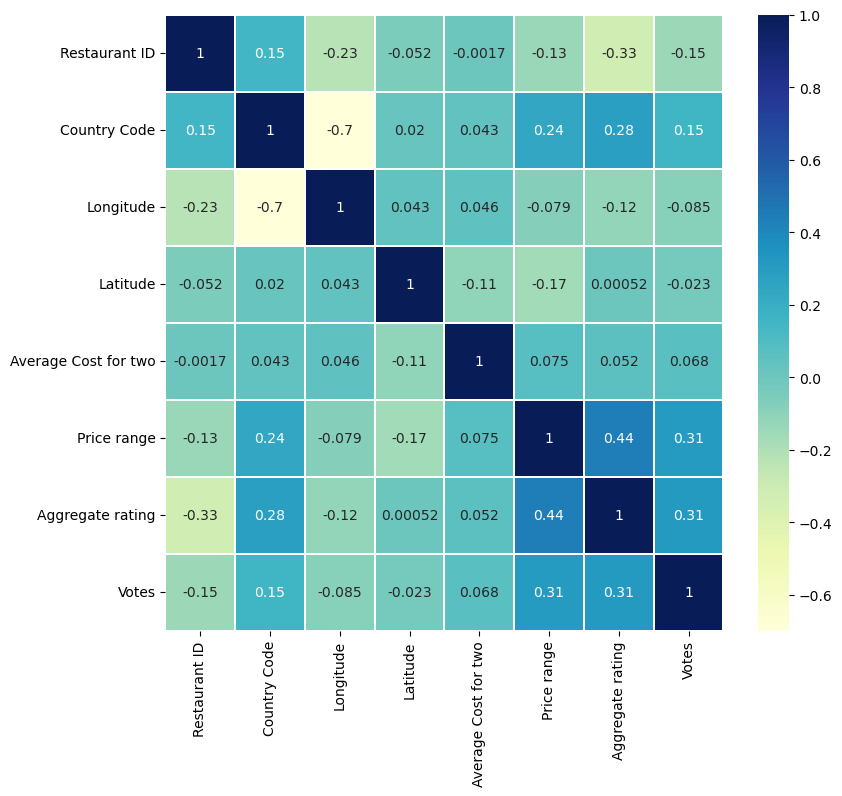

In [48]:
 
corrmat = df.corr(numeric_only=True) 
  
f,ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corrmat, 
            annot=True,
            ax = ax, 
            cmap ="YlGnBu", 
            linewidths = 0.1) 

## KNN Regression

## Predicting 'Average Cost for Two' using 'Currency'

### Importing train_test_split method to split the dataset into training and testing for training the model and then testing it.

In [49]:
from sklearn.model_selection import train_test_split

## Using KNN for regression

In [51]:
x=df[['Currency']]
y=df['Average Cost for two']

x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=42)

dummies=pd.get_dummies(x_train) #ONE-HOT Encodings
dummies

dummies2=pd.get_dummies(x_test)
dummies2.head()

k=[]
accu=[]

for i in range(1,50):
    model = KNeighborsRegressor(n_neighbors = i)
    model.fit(dummies, y_train)  #fit the model
    pred=model.predict(dummies2) #make prediction on test set
    a=dummies2.shape
    accuracy = r2_score(y_test, pred)
    print("For k=",i)
    print("Accuracy is -",accuracy*100,'%') 
    k.append(i)
    accu.append(accuracy)

For k= 1
Accuracy is - 49.04839503547018 %
For k= 2
Accuracy is - 37.80383473833421 %
For k= 3
Accuracy is - 55.07639863629639 %
For k= 4
Accuracy is - 55.84678816763151 %
For k= 5
Accuracy is - 56.24020165661716 %
For k= 6
Accuracy is - 54.176406866070614 %
For k= 7
Accuracy is - 52.88218861571596 %
For k= 8
Accuracy is - 51.99071799551827 %
For k= 9
Accuracy is - 52.319135097801464 %
For k= 10
Accuracy is - 52.031204457855736 %
For k= 11
Accuracy is - 50.93530130970058 %
For k= 12
Accuracy is - 53.11765652606184 %
For k= 13
Accuracy is - 56.44137975829011 %
For k= 14
Accuracy is - 56.13418032392501 %
For k= 15
Accuracy is - 56.425391514797106 %
For k= 16
Accuracy is - 56.159233432269254 %
For k= 17
Accuracy is - 56.074441989756664 %
For k= 18
Accuracy is - 55.06009039883683 %
For k= 19
Accuracy is - 53.9426994134081 %
For k= 20
Accuracy is - 52.77833380274144 %
For k= 21
Accuracy is - 51.57524629223816 %
For k= 22
Accuracy is - 50.368386027301405 %
For k= 23
Accuracy is - 49.18455534

## We can see that the best accuracy score is for K=13

Text(0, 0.5, 'R2_score')

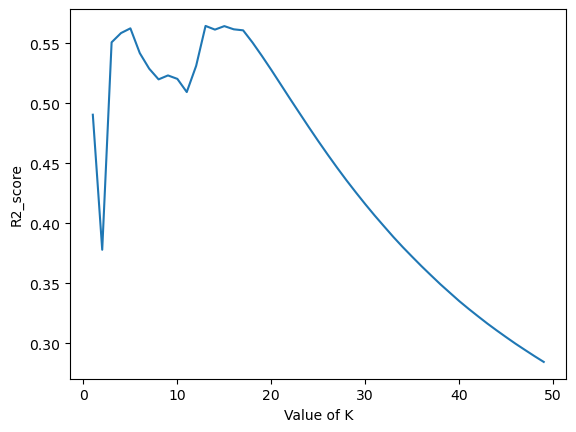

In [53]:
plt.plot(k,accu)
plt.xlabel("Value of K")
plt.ylabel("R2_score")

In [55]:
model = KNeighborsRegressor(n_neighbors = 6)
model.fit(dummies, y_train)  #fit the model
pred=model.predict(dummies2) #make prediction on test set
a=dummies2.shape

accuracy = r2_score(y_test, pred)
for i in range(a[0]):
    print("For ",x_test.iloc[i,:])
    print("average cost for two=")
    print(pred[i])

For  Currency    Indian Rupees(Rs.)
Name: 4731, dtype: object
average cost for two=
566.6666666666666
For  Currency    Indian Rupees(Rs.)
Name: 1468, dtype: object
average cost for two=
566.6666666666666
For  Currency    Indian Rupees(Rs.)
Name: 9037, dtype: object
average cost for two=
566.6666666666666
For  Currency    Indian Rupees(Rs.)
Name: 7866, dtype: object
average cost for two=
566.6666666666666
For  Currency    Indian Rupees(Rs.)
Name: 5570, dtype: object
average cost for two=
566.6666666666666
For  Currency    Indian Rupees(Rs.)
Name: 5613, dtype: object
average cost for two=
566.6666666666666
For  Currency    Indian Rupees(Rs.)
Name: 7751, dtype: object
average cost for two=
566.6666666666666
For  Currency    Indian Rupees(Rs.)
Name: 1662, dtype: object
average cost for two=
566.6666666666666
For  Currency    Indian Rupees(Rs.)
Name: 8592, dtype: object
average cost for two=
566.6666666666666
For  Currency    Indian Rupees(Rs.)
Name: 2164, dtype: object
average cost for two

In [56]:
accuracy = r2_score(y_test, pred)
print("Accuracy is -",accuracy*100,'%') 

Accuracy is - 54.176406866070614 %


1. ## Accuracy score is 54.1%.

## Predicting 'Average Cost for Two' using 'Currency' and 'Rating text'

In [57]:
x=df[['Currency','Rating text']]
y=df['Average Cost for two']
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=42)
dummies=pd.get_dummies(x_train)
dummies
dummies2=pd.get_dummies(x_test)
dummies2.head()
accur=[]
K1=[]
rmse=[]
y_test2=y_test.values##Converting y_test to numpy array

for i in range(1,50):
    model = KNeighborsRegressor(n_neighbors = i)
    model.fit(dummies, y_train)  #fit the model
    pred=model.predict(dummies2) #make prediction on test set
    accuracy = r2_score(y_test, pred)
    error=sqrt(mean_squared_error(y_test2,pred))
    print("For K=",i)
    print("Root Mean Squared Error is-",error)
    print("Accuracy is -",accuracy*100,'%') 
    K1.append(i)
    rmse.append(error)
    accur.append(accuracy)

For K= 1
Root Mean Squared Error is- 14132.56484012121
Accuracy is - 47.59588510476305 %
For K= 2
Root Mean Squared Error is- 11118.55419786862
Accuracy is - 67.56454073808575 %
For K= 3
Root Mean Squared Error is- 12114.547626979276
Accuracy is - 61.49316534841023 %
For K= 4
Root Mean Squared Error is- 12578.8680107905
Accuracy is - 58.484857110084334 %
For K= 5
Root Mean Squared Error is- 12953.84740827128
Accuracy is - 55.972809718383544 %
For K= 6
Root Mean Squared Error is- 14249.980324465196
Accuracy is - 46.72150527981588 %
For K= 7
Root Mean Squared Error is- 14842.7363931601
Accuracy is - 42.196868682312704 %
For K= 8
Root Mean Squared Error is- 15191.825326790507
Accuracy is - 39.445930715309764 %
For K= 9
Root Mean Squared Error is- 15516.252184920128
Accuracy is - 36.832007381160366 %
For K= 10
Root Mean Squared Error is- 15763.4494794475
Accuracy is - 34.803251777929454 %
For K= 11
Root Mean Squared Error is- 15997.386625054196
Accuracy is - 32.8537908733734 %
For K= 12
Ro

## Root Mean Squared Error vs K values

Text(0, 0.5, 'RMSE')

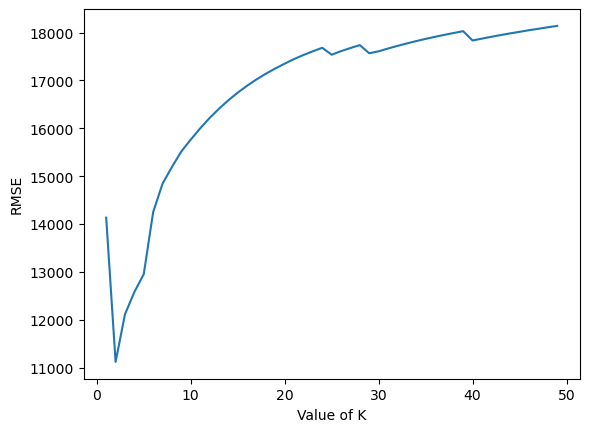

In [58]:
plt.plot(K1,rmse)

plt.xlabel("Value of K")
plt.ylabel("RMSE")

Text(0, 0.5, 'R2_score')

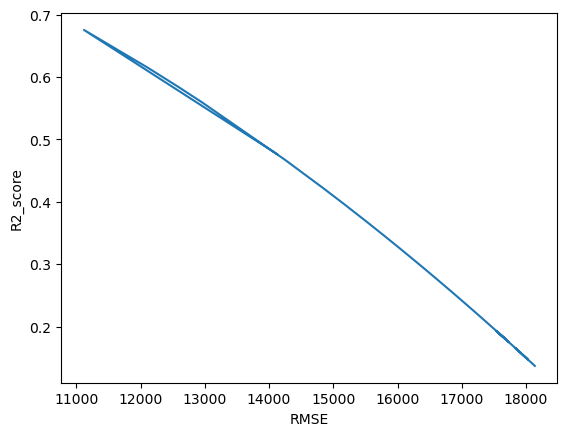

In [59]:
plt.plot(rmse,accur)
plt.xlabel("RMSE")
plt.ylabel("R2_score")

## From this plot it is clear that the highest R2_score is corressponding to the lowest value of RMSE.

## R2_Score Error vs K values

Text(0, 0.5, 'R2_score')

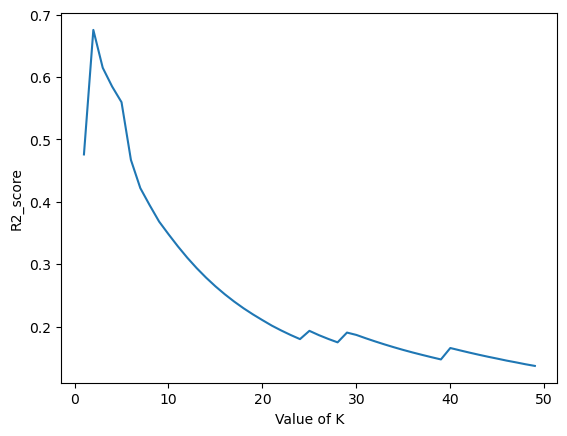

In [60]:
plt.plot(K1,accur)

plt.xlabel("Value of K")
plt.ylabel("R2_score")

## We can observe that the maximum accuracy and minimum RMSE value is corressponding to the K-value=2

In [62]:
a=dummies2.shape
model = KNeighborsRegressor(n_neighbors = 2)
model.fit(dummies, y_train)  #fit the model
pred=model.predict(dummies2) #make prediction on test set
for i in range(a[0]):
    print("For ",x_test.iloc[i,:])
    print("average cost for two=")
    print(pred[i])


For  Currency       Indian Rupees(Rs.)
Rating text                  Poor
Name: 4731, dtype: object
average cost for two=
550.0
For  Currency       Indian Rupees(Rs.)
Rating text             Very Good
Name: 1468, dtype: object
average cost for two=
1400.0
For  Currency       Indian Rupees(Rs.)
Rating text               Average
Name: 9037, dtype: object
average cost for two=
1000.0
For  Currency       Indian Rupees(Rs.)
Rating text             Very Good
Name: 7866, dtype: object
average cost for two=
1400.0
For  Currency       Indian Rupees(Rs.)
Rating text                  Good
Name: 5570, dtype: object
average cost for two=
425.0
For  Currency       Indian Rupees(Rs.)
Rating text             Not rated
Name: 5613, dtype: object
average cost for two=
175.0
For  Currency       Indian Rupees(Rs.)
Rating text               Average
Name: 7751, dtype: object
average cost for two=
1000.0
For  Currency       Indian Rupees(Rs.)
Rating text             Not rated
Name: 1662, dtype: object
average 

In [63]:
accuracy = r2_score(y_test, pred)
print("For K=",2)
print("Accuracy is -",accuracy*100,'%')

For K= 2
Accuracy is - 67.56454073808575 %


## Accuracy score is about 67.52% which is significant.

#### **From above it is clear that for various currency based on rating, average cost for two varies.**
For Indian rupees the average cost for two based on rating are approximated as follows-
        
        Poor-Rs.550
        Average-Rs.575
        Good-Rs.300
        Very good-Rs.1400
        Not rated-Rs.475
So,with the above prediction any customer can be sure of how they have to spend for their required quality of foods on Indian Rupees

Ref: https://medium.com/analytics-vidhya/evaluation-metrics-for-regression-models-c91c65d73af